In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn import linear_model

import re
from datetime import timedelta

In [201]:
hitches = [line.rstrip('\r\n') for line in open(r'C:\Users\syber\Desktop\THESIS\Hitches\THESIS-sandbox.csv')]
type(hitches)
hitches[1]

'00d00h08m04s 1806'

In [209]:
hitches = [line.rstrip('\r\n') for line in open(r'C:\Users\syber\Desktop\THESIS\Hitches\THESIS-sandbox.csv')]
type(hitches)
hitches[1]

regex = re.compile(r'((?P<days>\d+?)d)?((?P<hours>\d+?)h)?((?P<minutes>\d+?)m)?((?P<seconds>\d+?)s) (?P<date>\d+?)?$')

def parse_time(time_str):
    parts = regex.match(time_str)
    if not parts:
        return
    parts = parts.groupdict()
    
    time_params = {}
    interval_params = ['days', 'hours', 'minutes', 'seconds']
    for (name) in (interval_params):
        time_params[name] = int(parts[name])
           
    return int(timedelta(**time_params).seconds), int(parts['date']) 

wow = map(parse_time, hitches)
kek = np.asmatrix(wow)
print kek[3:7]

[[ 405 1806]
 [ 857 1806]
 [ 568 1806]
 [ 329 1806]]


[]


In [163]:
kek.shape

(1L, 10656L)

In [210]:
keys = np.array(kek[:,1])
type(keys)

numpy.ndarray

In [211]:
keys[3:7]

array([[1806],
       [1806],
       [1806],
       [1806]])

In [212]:
unkeys = np.unique(keys)
unkeys

array([1612, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710,
       1711, 1712, 1801, 1802, 1803, 1804, 1805, 1806])

In [215]:
dict = {}
for date in unkeys:
    wow = np.squeeze(np.asarray(kek[kek[:,1] == date]))
#     print type(wow)
#     print wow.shape
#     dict[date] = np.array(wow).astype(np.int)
    dict[date] = np.mean(np.array(wow).astype(np.int))
    
print dict

{1804: 3431.4448105436572, 1708: 9569.4012738853507, 1805: 3077.3775999999998, 1701: 13141.047091412742, 1702: 13297.081920903955, 1703: 11080.773930753565, 1704: 18445.365180467092, 1705: 19117.685025817555, 1706: 11118.121065375302, 1707: 10292.386324786325, 1612: 10525.905376344086, 1709: 11938.688059701493, 1710: 7060.9845679012342, 1711: 4819.5399361022364, 1712: 6421.5971049457175, 1803: 4225.7058823529414, 1806: 3453.1700000000001, 1801: 2612.6482142857144, 1802: 1780.9032258064517}


In [207]:
print type(dict['01M17Y'])
print type(dict['01M17Y'][1])
print type(dict['01M17Y'])
np.mean(dict['01M17Y'])

KeyError: '01M17Y'

([<matplotlib.axis.XTick at 0xb5c69e8>,
 <a list of 19 Text xticklabel objects>)

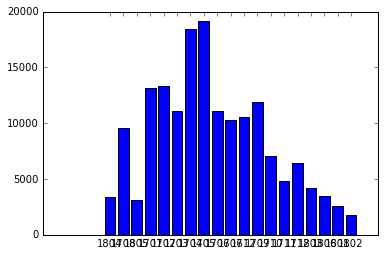

In [267]:
 plt.bar(range(len(dict)), dict.values(), align='center')  # python 2.x
plt.xticks(range(len(dict)), dict.keys())

In [232]:
dict.keys()

[1804,
 1708,
 1805,
 1701,
 1702,
 1703,
 1704,
 1705,
 1706,
 1707,
 1612,
 1709,
 1710,
 1711,
 1712,
 1803,
 1806,
 1801,
 1802]

In [259]:
mat = np.zeros([2L,0])
print mat.shape

for (rrr) in (dict.keys()):
#     print dict[rrr]
    print np.array([dict[rrr], rrr]).shape
    mat = np.vstack([mat, np.array([dict[rrr], rrr])])
#     plt.scatter(x=rrr, y=dict[rrr], marker='.', s=3.0)

(2L, 0L)
(2L,)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [264]:
list = []
k = []
y = []
for (rrr) in (dict.keys()):
    k.append(rrr)
    y.append(dict[rrr])
    list.append([rrr, dict[rrr]])
print list    

[[1804, 3431.4448105436572], [1708, 9569.4012738853507], [1805, 3077.3775999999998], [1701, 13141.047091412742], [1702, 13297.081920903955], [1703, 11080.773930753565], [1704, 18445.365180467092], [1705, 19117.685025817555], [1706, 11118.121065375302], [1707, 10292.386324786325], [1612, 10525.905376344086], [1709, 11938.688059701493], [1710, 7060.9845679012342], [1711, 4819.5399361022364], [1712, 6421.5971049457175], [1803, 4225.7058823529414], [1806, 3453.1700000000001], [1801, 2612.6482142857144], [1802, 1780.9032258064517]]


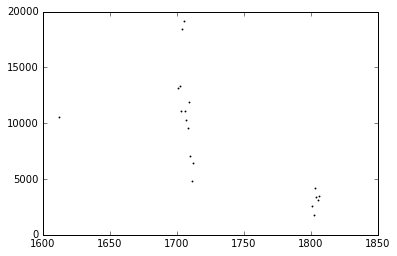

In [265]:
plt.scatter(x=k, y=y, marker='.', s=3.0)

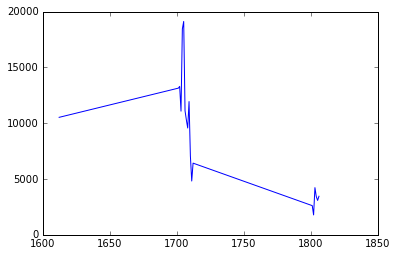

In [266]:
lists = sorted(dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

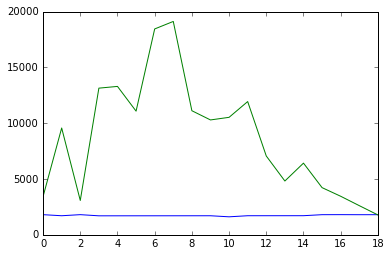

In [263]:
plt.plot(list)